In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [2]:
# 책 p134

In [3]:
f_path = 'D:/GIL/programming/Python_teacher_2/JupyterLab/NLP/chap03'
data_set = utils.get_file(fname=f_path + 'imdb.tar.gz',
            origin='http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
                          extract=True, cache_subdir='datasets',
                          cache_dir=f_path)

In [4]:
def directory_data(directory):
    data = {}
    data['review'] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), 'r', encoding='utf-8') as file:
            data['review'].append(file.read())
            
        return pd.DataFrame.from_dict(data)

In [5]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, 'pos'))
    neg_df = directory_data(os.path.join(directory, 'neg'))
    pos_df['sentiment'] = 1
    neg_df['sentiment'] = 0
    
    return pd.concat([pos_df, neg_df])

In [6]:
train_df = data(os.path.join(f_path, 'datasets', 'aclImdb', 'train'))
test_df = data(os.path.join(f_path, 'datasets', 'aclImdb', 'test'))

In [7]:
print(train_df.head())

                                              review  sentiment
0  Bromwell High is a cartoon comedy. It ran at t...          1
0  Story of a man who has unnatural feelings for ...          0


In [8]:
print(train_df.tail())

                                              review  sentiment
0  Bromwell High is a cartoon comedy. It ran at t...          1
0  Story of a man who has unnatural feelings for ...          0


In [9]:
# 책 p136

In [10]:
reviews = list(train_df['review'])

# reviews는 각 문장을 리스트로 담고 있다.

In [11]:
# 데이터 분석을 위한 사전 준비 작업

# 문자열 문장 리스트를 토크아니징
tokenized_reviews = [r.split() for r in reviews]

# 토크나이징된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

# 토크나이징된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

# 위와 같이 만드는 이유는 
# 문장에 포함된 단어와 알파벳의 개수에 대한 데이터 분석을 
# 수월하게 만들기 위해서다

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11688/2884987093.py:18: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of Reviews')

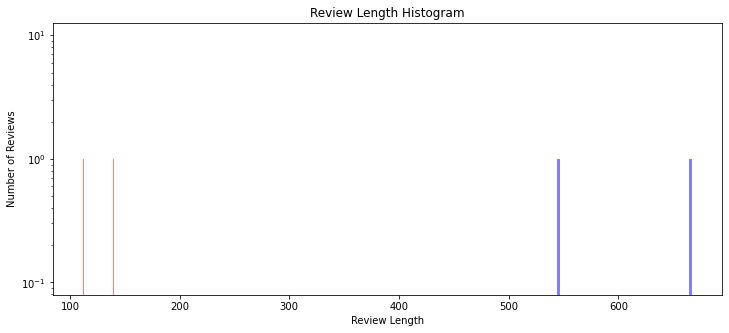

In [12]:
# 데이터 분석을 진행

# 먼저 히스토그램으로 문장을 구성하는 단어의 개수와 알파벳 개수를 알아보자.

import matplotlib.pyplot as plt

# 그래프에 대한 이미지 크기 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))

# 히스토그램 선언
# bins: 히스토그램 값에 대한 버킷 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')

# 그래프 제목
plt.title('Review Length Histogram')

# 그래프 x 축 라벨
plt.xlabel('Review Length')

# 그래프 y 축 라벨
plt.ylabel('Number of Reviews')

In [13]:
# 그림 잘못됨. 원인 모름

In [17]:
# 데이터 분포를 통계치로 수치화해보자

In [18]:
import numpy as np

print('문장 최대 길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소 길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균 길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간 길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0~100 스케일로 돼 있음
print('제1사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제3사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

# 사분위 지점은 전체 데이터에서 1/4, 3/4 지점을 의미

문장 최대 길이: 140
문장 최소 길이: 112
문장 평균 길이: 126.00
문장 길이 표준편차: 14.00
문장 중간 길이: 126.0
제1사분위 길이: 119.0
제3사분위 길이: 133.0


In [ ]:
# 박스 플롯으로 데이터를 시각화
# 문장 내 단어 수와 문장에 알파벳 개수를 각각 따로 박스 플롯으로 만들어 봄

{'whiskers': [<matplotlib.lines.Line2D at 0x19bfdab8c70>,
 'caps': [<matplotlib.lines.Line2D at 0x19bfdac01f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19bfdab8820>],
 'medians': [<matplotlib.lines.Line2D at 0x19bfdac0910>],
 'fliers': [<matplotlib.lines.Line2D at 0x19bfdacb070>],
 'means': [<matplotlib.lines.Line2D at 0x19bfdac0ca0>]}

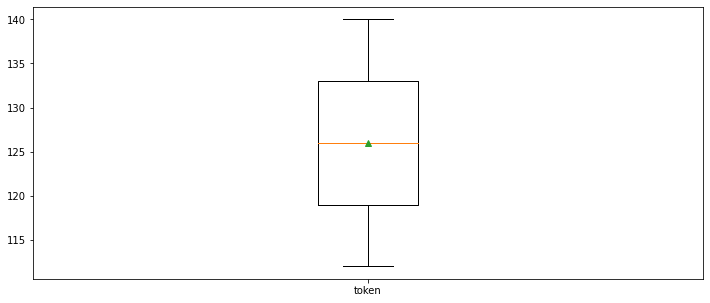

In [19]:
plt.figure(figsize=(12, 5))
# 박스 플롯 생성
# 첫 번째 인자: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token],
            labels=['token'],
            showmeans=True)

In [20]:
# 세로로 긴 검고, 굵은 줄(동그라미 겹친부분) : 특이점
# 그 밑에 가로로 그어진 선 : 제3사분위로부터 3/2 지점

# 녹색 화살표 : 평균값
# 주황 줄 : 중간값
# 사각형 바닥 : 제1사분위
# 사각형 천장 : 제3사분위
# 맨 아래줄 : 제1사분위로부터 3/2 지점

{'whiskers': [<matplotlib.lines.Line2D at 0x19bfdb185e0>,
 'caps': [<matplotlib.lines.Line2D at 0x19bfdb18d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x19bfdb18250>],
 'medians': [<matplotlib.lines.Line2D at 0x19bfdb23460>],
 'fliers': [<matplotlib.lines.Line2D at 0x19bfdb23b80>],
 'means': [<matplotlib.lines.Line2D at 0x19bfdb237f0>]}

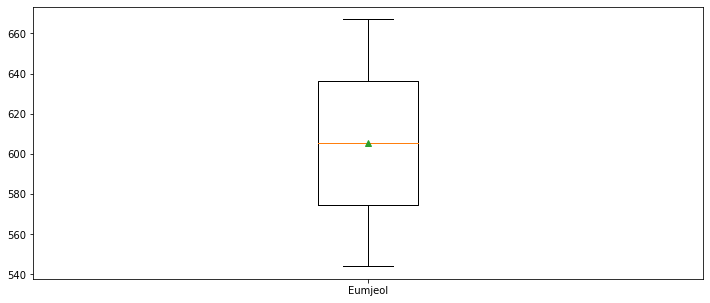

In [21]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
            labels=['Eumjeol'],
            showmeans=True)

In [14]:
# 구글 워드 클라우드 설치

In [15]:
# conda install -c conda-forge wordcloud

In [16]:
# 워드 클라우드 쓰는 방법 간단.

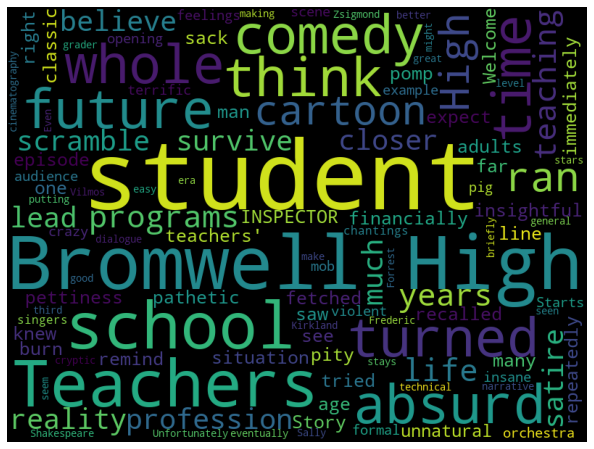

In [22]:
from wordcloud import WordCloud, STOPWORDS
# 불용어 제거하기 위하여 STOPWORDS=불용어사전 가져와야함

wordcloud = WordCloud(stopwords=STOPWORDS,   # 불용어 저장
                      background_color='black',
                      width=800, height=600).generate(''.join(train_df['review']))  # <- generate 안에 넣어줌
# 리뷰에 있는 모든 문장을 합쳐서 건져 줄 것  -> ''.join(train_df['review']

plt.figure(figsize=(13, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

C:\Users\Administrator\anaconda3\envs\python-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

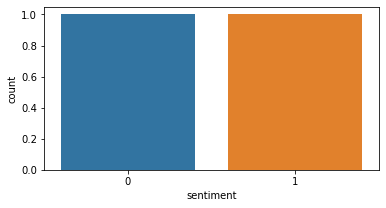

In [23]:
# 마지막으로 긍정 부정의 분포를 확인
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])